>> ### Correlation between news and stock movement for APPL

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')

>>> #### Load data

In [2]:
stockData = pd.read_csv("./data/yfinance_data/AAPL_historical_data.csv")
newsData = pd.read_csv('./data/raw_analyst_ratings.csv')

In [3]:
newsData.head(10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [4]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0


>>#### Normalize and Align Dates

In [5]:
from scripts.newsStockCorrelation import normalize_dates
newsData, stockData = normalize_dates(newsData, stockData)

>> #### Perform Sentiment Analysis

In [6]:
from scripts.newsStockCorrelation import analyze_sentiment
newsData = analyze_sentiment(newsData)

In [7]:
newsData.head(10)

,unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,0.00


>> #### Aggregate Sentiments by Date

In [8]:
from scripts.newsStockCorrelation import aggregate_sentiments
sentimentData = aggregate_sentiments(newsData)

In [9]:
sentimentData.head(10)

,date,sentiment
0,2009-02-14 00:00:00+00:00,0.000000
1,2009-04-27 00:00:00+00:00,0.000000
2,2009-04-29 00:00:00+00:00,0.000000
3,2009-05-22 00:00:00+00:00,0.000000
4,2009-05-27 00:00:00+00:00,0.234091
5,2009-05-29 00:00:00+00:00,0.068182
6,2009-05-30 00:00:00+00:00,0.118182
7,2009-06-01 00:00:00+00:00,0.000000
8,2009-06-02 00:00:00+00:00,0.000000
9,2009-06-05 00:00:00+00:00,0.083333


>> #### Calculate Daily Stock Returns

In [10]:
from scripts.newsStockCorrelation import calculate_stock_returns
stockData = calculate_stock_returns(stockData)

In [11]:
stockData.head(10)

,date,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,1980-12-12 00:00:00+00:00,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN
1,1980-12-15 00:00:00+00:00,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,-5.217061
2,1980-12-16 00:00:00+00:00,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,-7.339788
3,1980-12-17 00:00:00+00:00,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,2.475091
4,1980-12-18 00:00:00+00:00,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,2.899246
5,1980-12-19 00:00:00+00:00,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0,6.102867
6,1980-12-22 00:00:00+00:00,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0,4.866958
7,1980-12-23 00:00:00+00:00,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0,4.219904
8,1980-12-24 00:00:00+00:00,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0,5.262818
9,1980-12-26 00:00:00+00:00,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0,9.230886


>> #### Merge Datasets

In [12]:
from scripts.newsStockCorrelation import merge_datasets

In [13]:
mergedData = merge_datasets(sentimentData, stockData)

In [14]:
mergedData.head(10)

,date,sentiment,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2009-04-27 00:00:00+00:00,0.000000,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,0.669889
1,2009-04-29 00:00:00+00:00,0.000000,4.458929,4.530357,4.422500,4.469286,3.774201,458110800,0.0,0.0,1.000808
2,2009-05-22 00:00:00+00:00,0.000000,4.430357,4.435000,4.348214,4.375000,3.694580,297998400,0.0,0.0,-1.352874
3,2009-05-27 00:00:00+00:00,0.234091,4.706429,4.820714,4.675357,4.751786,4.012765,646422000,0.0,0.0,1.735759
4,2009-05-29 00:00:00+00:00,0.068182,4.835357,4.853571,4.780357,4.850357,4.096007,456534400,0.0,0.0,0.547857
5,2009-06-01 00:00:00+00:00,0.000000,4.873929,4.999643,4.857143,4.976786,4.202771,452499600,0.0,0.0,2.606593
6,2009-06-02 00:00:00+00:00,0.000000,4.963929,5.047857,4.941071,4.981786,4.206994,456223600,0.0,0.0,0.100459
7,2009-06-05 00:00:00+00:00,0.083333,5.189643,5.228571,5.114643,5.166786,4.363224,632716000,0.0,0.0,0.647016
8,2009-06-08 00:00:00+00:00,0.218182,5.136429,5.151071,4.979643,5.137500,4.338492,931652400,0.0,0.0,-0.566820
9,2009-06-09 00:00:00+00:00,0.000000,5.136071,5.162857,5.019643,5.097143,4.304410,676964400,0.0,0.0,-0.785531


In [15]:
stockData.head(10)

,date,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,1980-12-12 00:00:00+00:00,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN
1,1980-12-15 00:00:00+00:00,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,-5.217061
2,1980-12-16 00:00:00+00:00,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,-7.339788
3,1980-12-17 00:00:00+00:00,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,2.475091
4,1980-12-18 00:00:00+00:00,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,2.899246
5,1980-12-19 00:00:00+00:00,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0,6.102867
6,1980-12-22 00:00:00+00:00,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0,4.866958
7,1980-12-23 00:00:00+00:00,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0,4.219904
8,1980-12-24 00:00:00+00:00,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0,5.262818
9,1980-12-26 00:00:00+00:00,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0,9.230886


In [16]:
mergedData.head(10)

,date,sentiment,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2009-04-27 00:00:00+00:00,0.000000,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,0.669889
1,2009-04-29 00:00:00+00:00,0.000000,4.458929,4.530357,4.422500,4.469286,3.774201,458110800,0.0,0.0,1.000808
2,2009-05-22 00:00:00+00:00,0.000000,4.430357,4.435000,4.348214,4.375000,3.694580,297998400,0.0,0.0,-1.352874
3,2009-05-27 00:00:00+00:00,0.234091,4.706429,4.820714,4.675357,4.751786,4.012765,646422000,0.0,0.0,1.735759
4,2009-05-29 00:00:00+00:00,0.068182,4.835357,4.853571,4.780357,4.850357,4.096007,456534400,0.0,0.0,0.547857
5,2009-06-01 00:00:00+00:00,0.000000,4.873929,4.999643,4.857143,4.976786,4.202771,452499600,0.0,0.0,2.606593
6,2009-06-02 00:00:00+00:00,0.000000,4.963929,5.047857,4.941071,4.981786,4.206994,456223600,0.0,0.0,0.100459
7,2009-06-05 00:00:00+00:00,0.083333,5.189643,5.228571,5.114643,5.166786,4.363224,632716000,0.0,0.0,0.647016
8,2009-06-08 00:00:00+00:00,0.218182,5.136429,5.151071,4.979643,5.137500,4.338492,931652400,0.0,0.0,-0.566820
9,2009-06-09 00:00:00+00:00,0.000000,5.136071,5.162857,5.019643,5.097143,4.304410,676964400,0.0,0.0,-0.785531


>> #### Correlation Analysis

In [17]:
from scripts.newsStockCorrelation import correlation_analysis

correlation, p_value = correlation_analysis(mergedData)
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: 0.05, P-value: 0.0120


>> #### Visualization

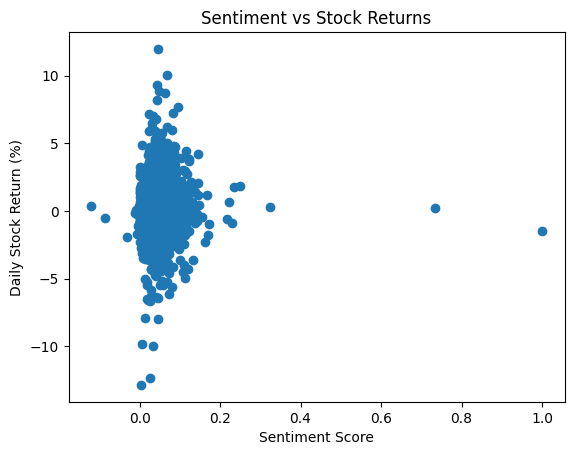

In [18]:
from scripts.newsStockCorrelation import plot_correlation

plot_correlation(mergedData)